In [40]:
from __future__ import division
%matplotlib inline
import CameraNetwork
import CameraNetwork.global_settings as gs
from CameraNetwork.utils import extractThumbnails
import cPickle
import cv2
import datetime
import Image
import ImageDraw
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import skimage.io as io
import time
import tqdm
from tqdm import tqdm
import traceback
plt.rcParams['figure.figsize'] = (8.0, 8.0)

In [2]:
c = CameraNetwork.CLIclient(timeout=60)
proxy_params = CameraNetwork.retrieve_proxy_parameters()
c.start(proxy_params)
time.sleep(3)
print c.client_instance.servers

ERROR:root:Failed retrieving proxy parameters:
Traceback (most recent call last):
  File "c:\users\amitaid\documents\code\cameranetwork_git\CameraNetwork\internet.py", line 56, in retrieve_proxy_parameters
    response = urllib2.urlopen(req)
  File "C:\ProgramData\Anaconda2\lib\urllib2.py", line 154, in urlopen
    return opener.open(url, data, timeout)
  File "C:\ProgramData\Anaconda2\lib\urllib2.py", line 435, in open
    response = meth(req, response)
  File "C:\ProgramData\Anaconda2\lib\urllib2.py", line 548, in http_response
    'http', request, response, code, msg, hdrs)
  File "C:\ProgramData\Anaconda2\lib\urllib2.py", line 473, in error
    return self._call_chain(*args)
  File "C:\ProgramData\Anaconda2\lib\urllib2.py", line 407, in _call_chain
    result = func(*args)
  File "C:\ProgramData\Anaconda2\lib\urllib2.py", line 556, in http_error_default
    raise HTTPError(req.get_full_url(), code, msg, hdrs, fp)
HTTPError: HTTP Error 404: Not Found



['109', '109L', '110', '110L', '111', '111L', '112', '112L', '113L', '114', '114L', '115', '115L', '116', '116L', '117', '117L', '118', '118L', '119', '119L', '120']


In [3]:
local_servers = [server_id for server_id in c.servers_list if server_id.endswith("L")]
print local_servers

['109L', '110L', '111L', '112L', '113L', '114L', '115L', '116L', '117L', '118L', '119L']


In [17]:
def fixImage(img, gamma=1):
    img = img[::-1, ...].astype(np.float)**gamma
    return (img/img.max()*255).astype(np.uint8)

In [5]:
images_ = {}
dfs_ = {}

In [63]:
images, dfs = {}, {}
DATE = "2017-03-25"
for server_id in tqdm(local_servers[1:]):
    reply = c[server_id].thumbnails(DATE, "5T", resolution=201, hdr_index=3, jpeg=100)
    images[server_id] = extractThumbnails(reply[1][0]["thumbnails"])
    dfs[server_id] = reply[1][0]["thumbs_df"]


  0%|                                                                                                 | 0/10 [00:00<?, ?it/s]

 10%|████████▉                                                                                | 1/10 [00:48<07:17, 48.59s/it]

Exception: Server 111L raised Exception:
Calling the cmd handler caused an error:
Traceback (most recent call last):
  File "i:\amit\office backup\amit\studies\cameranetwork_git\CameraNetwork\server.py", line 286, in _on_request
    answer = yield cb(*args, **kwds)
  File "C:\Anaconda2\lib\site-packages\tornado\gen.py", line 1015, in run
    value = future.result()
  File "C:\Anaconda2\lib\site-packages\concurrent\futures\_base.py", line 398, in result
    return self.__get_result()
  File "C:\Anaconda2\lib\site-packages\concurrent\futures\thread.py", line 55, in run
    result = self.fn(*self.args, **self.kwargs)
  File "i:\amit\office backup\amit\studies\cameranetwork_git\CameraNetwork\server.py", line 646, in handle_thumbnails
    query_df = getImagesDF(query_date, force=True)
  File "i:\amit\office backup\amit\studies\cameranetwork_git\CameraNetwork\utils.py", line 781, in getImagesDF
    raise Exception('Non existing day: {}'.format(base_path))
Exception: Non existing day: i:\amit\data\experiment_2017_02-03\cam_111\captured_images\2017_03_25


In [57]:
images_[DATE+"_3"] = images
dfs_[DATE+"_3"] = dfs
image_lengths = np.array([len(images[si]) for si in local_servers[:-1]])
print image_lengths.min()

118


In [58]:
video = cv2.VideoWriter(
    'MOSAIC_MOVE_{}_3_2.avi'.format(DATE),
    -1, 8, (804, 603)
)

for ind in tqdm(range(image_lengths.min())):
    try:
        full_image = np.zeros((603, 804, 3), dtype=np.uint8)
        for i, server_id in enumerate(local_servers[:-1]):
            m = i // 4
            n = i - m * 4
            full_image[201*m:201*(m+1), 201*n:201*(n+1), ...] = fixImage(images[server_id][ind], gamma=0.9)
        video.write(cv2.cvtColor(np.array(full_image), cv2.COLOR_RGB2BGR))
    except Exception, e:
        traceback.print_exc()
        
video.release()


  4%|███▋                                                                                    | 5/118 [00:00<00:12,  8.75it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:12<00:00,  9.71it/s]

## Debug

In [52]:
full_image = np.zeros((603, 804, 3), dtype=np.uint8)
for i, server_id in enumerate(local_servers[:-1]):
    m = i // 4
    n = i - m * 4
    full_image[201*m:201*(m+1), 201*n:201*(n+1), ...] = fixImage(images[server_id][50], gamma=0.9)

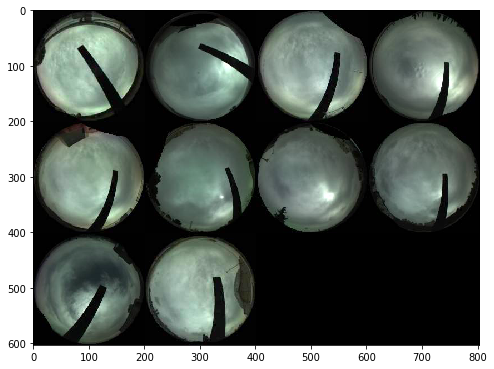

In [53]:
plt.imshow(full_image)

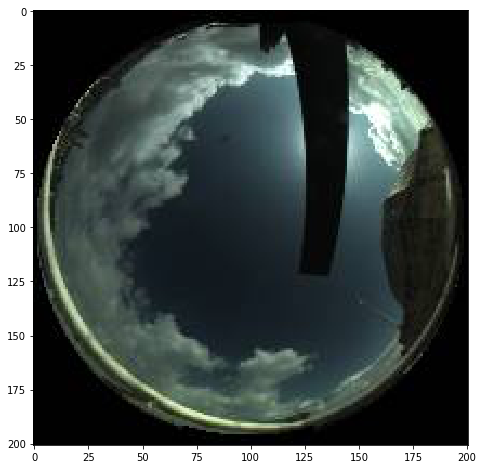

In [23]:
plt.imshow(images[server_id][50])